In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data = pd.read_csv("test.csv", skiprows=4)

In [17]:
# Preview the first few rows
print(data.head())

   895  3                              Wirz, Mr. Albert    male    27  0  0.1  \
0  896  3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0  1    1   
1  897  3                    Svensson, Mr. Johan Cervin    male  14.0  0    0   
2  898  3                          Connolly, Miss. Kate  female  30.0  0    0   
3  899  2                  Caldwell, Mr. Albert Francis    male  26.0  1    1   
4  900  3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female  18.0  0    0   

    315154   8.6625 Unnamed: 9  S  
0  3101298  12.2875        NaN  S  
1     7538   9.2250        NaN  S  
2   330972   7.6292        NaN  Q  
3   248738  29.0000        NaN  S  
4     2657   7.2292        NaN  C  


In [18]:
data.head(5)

,895,3,"Wirz, Mr. Albert",male,27,0,0.1,315154,8.6625,Unnamed: 9,S
0,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
1,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
2,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
3,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
4,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [19]:
data.tail(5)

,895,3,"Wirz, Mr. Albert",male,27,0,0.1,315154,8.6625,Unnamed: 9,S
409,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
410,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
411,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
412,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
413,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [20]:
data.describe()

,895,3,27,0,0.1,8.6625
count,414.000000,414.000000,328.000000,414.000000,414.000000,413.000000
mean,1102.500000,2.260870,30.121951,0.449275,0.396135,35.891909
std,119.655756,0.843471,14.125243,0.899872,0.985407,56.113014
min,896.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,999.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1102.500000,3.000000,27.000000,0.000000,0.000000,14.458300
75%,1205.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   895               414 non-null    int64  
 1   3                 414 non-null    int64  
 2   Wirz, Mr. Albert  414 non-null    object 
 3   male              414 non-null    object 
 4   27                328 non-null    float64
 5   0                 414 non-null    int64  
 6   0.1               414 non-null    int64  
 7   315154            414 non-null    object 
 8   8.6625            413 non-null    float64
 9   Unnamed: 9        91 non-null     object 
 10  S                 414 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 35.7+ KB


In [22]:
data.duplicated().sum()

np.int64(0)

In [24]:
data.isnull().sum()

895                   0
3                     0
Wirz, Mr. Albert      0
male                  0
27                   86
0                     0
0.1                   0
315154                0
8.6625                1
Unnamed: 9          323
S                     0
dtype: int64

In [29]:
# Ensure column names are stripped
data.columns = data.columns.str.strip()

# Fill "Unnamed: 9" column
data["Unnamed: 9"] = data["Unnamed: 9"].fillna("Unknown")

# Fill "27" column
data["27"] = data["27"].fillna(data["27"].mean())



In [30]:
data.isnull().sum()

895                 0
3                   0
Wirz, Mr. Albert    0
male                0
27                  0
0                   0
0.1                 0
315154              0
8.6625              1
Unnamed: 9          0
S                   0
dtype: int64

In [31]:
data.duplicated().sum()

np.int64(0)

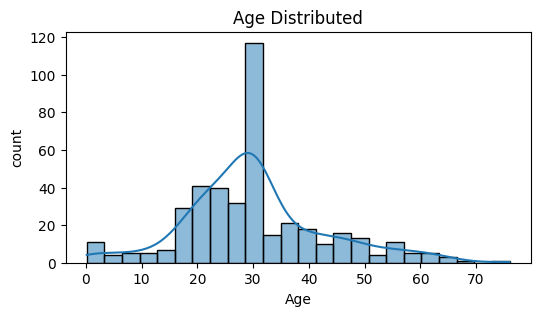

In [34]:
plt.figure(figsize=(6,3))
sns.histplot(data["27"],kde=True)
plt.title("Age Distributed")
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

C:\Users\mange\AppData\Local\Temp\ipykernel_12988\2222599239.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="survived",loc="upper right")


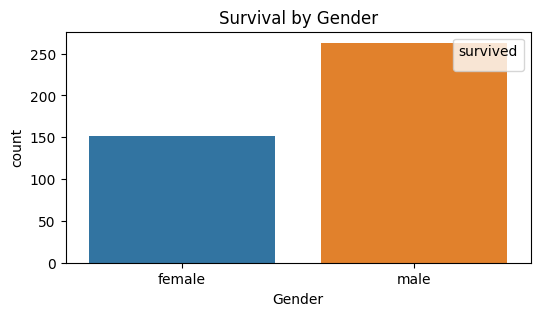

In [36]:
plt.figure(figsize=(6,3))
sns.countplot(data=data,x="male",hue="male")
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("count")
plt.legend(title="survived",loc="upper right")
plt.show()

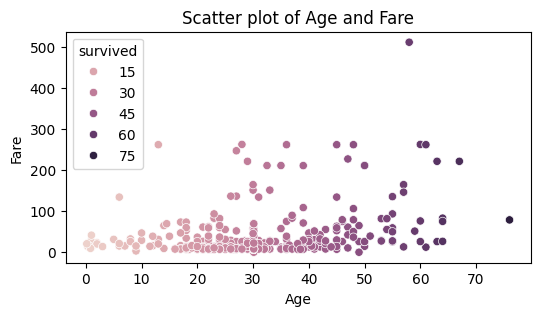

In [37]:
plt.figure(figsize=(6,3))
sns.scatterplot(data=data,x="27",y="8.6625",hue="27")
plt.title("Scatter plot of Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(title="survived")
plt.show()